Original data size: 90
Original data mean: 10.87
Original data standard deviation: 3.85

--- Bootstrapping Results (5000 iterations) ---
Original Mean: 10.8680
Bootstrapped Mean (average of bootstrap means): 10.8614
99% Confidence Interval for the Mean: (9.8700, 11.9220)
Bootstrapped Standard Error of the Mean: 0.4067


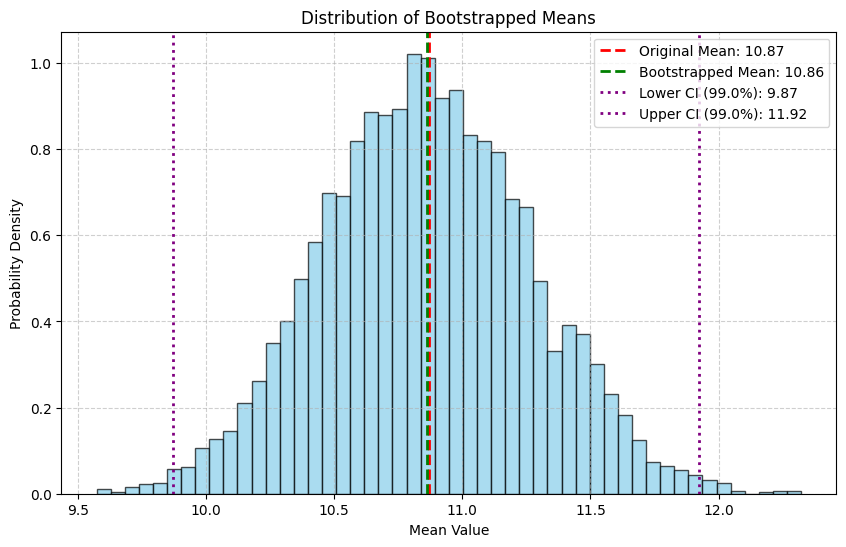


--- Using scipy.stats.bootstrap ---
99% Confidence Interval (scipy): 9.8434, 11.9112
Standard Error (scipy): 0.4063


In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def bootstrapped_mean(data, num_iterations=1000, confidence_level=0.95):
    """
    Calculates the bootstrapped mean and its confidence interval.

    Args:
        data (array-like): The input data.
        num_iterations (int): The number of bootstrap samples to generate.
        confidence_level (float): The desired confidence level for the interval (e.g., 0.95 for 95%).

    Returns:
        tuple: A tuple containing:
            - original_mean (float): The mean of the original data.
            - bootstrap_means (numpy.ndarray): An array of means from each bootstrap sample.
            - lower_bound (float): The lower bound of the confidence interval.
            - upper_bound (float): The upper bound of the confidence interval.
    """
    data = np.asarray(data)
    n_samples = len(data)
    original_mean = np.mean(data)

    bootstrap_means = np.empty(num_iterations)

    for i in range(num_iterations):
        # Resample with replacement
        bootstrap_sample = np.random.choice(data, size=n_samples, replace=True)
        bootstrap_means[i] = np.mean(bootstrap_sample)

    # Calculate confidence interval using percentiles
    alpha = (1.0 - confidence_level) / 2.0
    lower_bound = np.percentile(bootstrap_means, alpha * 100)
    upper_bound = np.percentile(bootstrap_means, (1 - alpha) * 100)

    return original_mean, bootstrap_means, lower_bound, upper_bound

if __name__ == "__main__":
    # Example Usage:
    # Let's create some sample data
    np.random.seed(42) # for reproducibility
    sample_data = np.concatenate([np.random.normal(loc=5, scale=1, size=10),
                                  np.random.normal(loc=10, scale=2, size=50),
                                  np.random.normal(loc=15, scale=3, size=30)])

    print(f"Original data size: {len(sample_data)}")
    print(f"Original data mean: {np.mean(sample_data):.2f}")
    print(f"Original data standard deviation: {np.std(sample_data):.2f}")

    num_bootstrap_iterations = 5000
    confidence = 0.99 # 99% confidence interval

    original_mean, b_means, lower_b, upper_b = bootstrapped_mean(
        sample_data, num_iterations=num_bootstrap_iterations, confidence_level=confidence
    )

    print(f"\n--- Bootstrapping Results ({num_bootstrap_iterations} iterations) ---")
    print(f"Original Mean: {original_mean:.4f}")
    print(f"Bootstrapped Mean (average of bootstrap means): {np.mean(b_means):.4f}")
    print(f"{int(confidence*100)}% Confidence Interval for the Mean: ({lower_b:.4f}, {upper_b:.4f})")
    print(f"Bootstrapped Standard Error of the Mean: {np.std(b_means):.4f}")

    # Plotting the distribution of bootstrapped means
    plt.figure(figsize=(10, 6))
    plt.hist(b_means, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    plt.axvline(original_mean, color='red', linestyle='dashed', linewidth=2, label=f'Original Mean: {original_mean:.2f}')
    plt.axvline(np.mean(b_means), color='green', linestyle='dashed', linewidth=2, label=f'Bootstrapped Mean: {np.mean(b_means):.2f}')
    plt.axvline(lower_b, color='purple', linestyle='dotted', linewidth=2, label=f'Lower CI ({confidence*100}%): {lower_b:.2f}')
    plt.axvline(upper_b, color='purple', linestyle='dotted', linewidth=2, label=f'Upper CI ({confidence*100}%): {upper_b:.2f}')
    plt.title('Distribution of Bootstrapped Means')
    plt.xlabel('Mean Value')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    # You can also use scipy.stats.bootstrap (requires scipy 1.6.0 or newer)
    # This provides a more convenient and often more robust way to do bootstrapping.
    try:
        res = stats.bootstrap((sample_data,), np.mean, confidence_level=confidence,
                              random_state=42, method='percentile')
        print("\n--- Using scipy.stats.bootstrap ---")
        print(f"{int(confidence*100)}% Confidence Interval (scipy): {res.confidence_interval.low:.4f}, {res.confidence_interval.high:.4f}")
        print(f"Standard Error (scipy): {res.standard_error:.4f}")
    except AttributeError:
        print("\nscipy.stats.bootstrap is not available. Please upgrade SciPy to version 1.6.0 or newer.")
    except Exception as e:
        print(f"\nAn error occurred while using scipy.stats.bootstrap: {e}")